# Experimental Data Analysis

Using Amy's Neuron 2014 data for analysis


In [1]:
# to use cd, etc
import sys
import os

import numpy as np
from numpy import linalg, matlib
# save, import and load data
from numpy import asarray, save, load
# needed for some matrix manipulations
import cvxpy as cp
import math 

import scipy
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
from datetime import datetime, date, time
import pandas as pd
import statsmodels.api as sm

import mat73

import matplotlib.pyplot as plt
# for plots
import seaborn
# set up seaborn for the plots
seaborn.set()

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
# select data - fill in

# change directory to specified path
pathDir = '/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev'

# example: Location: '.../Shared drives/aoLab/Data/bmiLearning_jeev/jeev080412/jeev080412a/tr_6/jeev080412a_tr_kin.mat
dataSubj = 'jeev'
dataStartDate = '072312'
dataEndData = '080412'

### Decoder Parameters

In [4]:
# decoderParams = 'decoderParams_'
# trKinData = '/jeev080412a/tr_6/jeev080412a_tr_kin.mat'

# # pathData = pathDir + "/" + dataSubj + dataStartDate 

# # ex: /Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev050212_050412
# pathExpData = pathData + dataSubj + dataStartDate + '_' + dataEndData
# pathDataFile = pathData + pathExpData

# os.chdir(pathData)
# os.getcwd()

## Importing Data

In [5]:
decDir = 'decoderParams_jeev072312_080412.mat'
# nDir is trial-aligned to the go cue and uses all the trial data
nDir = 'catNeuralDat_jeev072312_080412_trE7_B100.mat'
# nDir = 'avgFRts_bestDir_bmi_jeev050212_050412_trE7_B100_TR-100_200_allTr.mat'
pathDir = '/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev072312_080412'
os.chdir(pathDir)
os.getcwd()

'/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev072312_080412'

In [6]:
# dec_data = '/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev050212_050412/decoderParams_jeev050212_050412.mat'
dec_path = pathDir + '/' + decDir
n_path = pathDir + '/' + nDir

In [7]:
dec_dict = mat73.loadmat(dec_path,use_attrdict=True)
dec_dict.keys()

dict_keys(['H_MDp', 'H_MDv', 'H_PDp', 'H_PDv', 'Hs', 'K_MDp', 'K_MDv', 'K_PDp', 'K_PDv', 'Ks', 'Qs', 'bmiDay', 'bmiDecoderInd', 'bmiUnitInds', 'bmiUnitInds_all', 'bmiUnits', 'bmiUnits_all', 'sb', 'usedUnit_day', 'usedUnit_day_clean', 'usedUnit_decoder'])

In [8]:
dec_df = pd.DataFrame.from_dict(dec_dict, orient='index').transpose()
dec_df

/Users/mmadduri/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


H_MDp  \
0  [[5.051421882978384, 0.23156438678585467, 1.33...   

                                               H_MDv  \
0  [[2.1941646679571973, 0.10671335364736155, 0.4...   

                                               H_PDp  \
0  [[-1.9107144107567955, -0.06565825895771328, -...   

                                               H_PDv  \
0  [[-2.909976777223911, 0.2633413308018888, 0.15...   

                                                  Hs  \
0  [[[-1.6841938845001643, -1.810795189166841, -5...   

                                               K_MDp  \
0  [[0.007128897708823798, 0.002295524600647815, ...   

                                               K_MDv  \
0  [[0.005426004257869388, 0.002302959196577031, ...   

                                               K_PDp  \
0  [[-1.8676516465988018, -0.052352239207311524, ...   

                                               K_PDv  \
0  [[-2.2583114298280482, 0.3509299824927901, -0....   

                                                  Ks  ...  \
0  [[[-0.002085306110491175, -0.00135452705995111...  ...   

                                              bmiDay  \
0  [1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, ...   

                                       bmiDecoderInd  \
0  [1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...   

                                         bmiUnitInds  \
0  [51.0, 86.0, 106.0, 141.0, 146.0, 216.0, 221.0...   

                                     bmiUnitInds_all  \
0  [51.0, 86.0, 106.0, 141.0, 146.0, 216.0, 221.0...   

                                            bmiUnits  \
0  [sig011a, sig018a, sig022a, sig029a, sig030a, ...   

                                        bmiUnits_all  \
0  [sig011a, sig018a, sig022a, sig029a, sig030a, ...   

                                                  sb  \
0  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                        usedUnit_day  \
0  [[True, True, True, True, False, True, False, ...   

                                  usedUnit_day_clean  \
0  [[True, True, True, True, False, True, False, ...   

                                    usedUnit_decoder  
0  [[True, True, True, True, False, True, False, ...  

[1 rows x 21 columns]

In [9]:
dec_df['H_MDp'][0]

array([[ 5.05142188,  0.23156439,  1.33354782,  0.96220594,         nan,
         0.42599649,         nan,  3.78129441,  2.25053294,  6.53297099,
                nan,  4.49987828,  2.37725616,  6.75657084,  0.36949304,
         2.41397336,  3.06206388,  2.09796126,  1.0215331 ],
       [ 2.72238891,  1.41786312,  1.50868917,  1.79765884,         nan,
         4.48840414,         nan,  3.52584587,  6.13658905,  5.95012108,
                nan,  4.15389066,  2.48262691,  7.65595689,  2.22914364,
         1.94221517,  3.37351267,  2.58230562,  3.24317028],
       [ 6.90884348,  0.67715784,  1.01975224,  2.00343082,         nan,
         2.8608413 ,         nan,  6.78203702, 10.92631069,  6.5498457 ,
                nan,  7.18683553,  4.15618847,  9.80965756,  2.74092816,
         4.48778758,  6.269363  ,  2.25852312,  1.77521211],
       [ 6.90884348,  0.67715784,         nan,  2.00343082,  1.01975224,
                nan,         nan,  6.78203702, 10.92631069,  6.5498457 ,
         2.860

In [10]:
# how to access elements in the data frame
dec_day = 2
dec_df['H_MDp'][0][dec_day]

array([ 6.90884348,  0.67715784,  1.01975224,  2.00343082,         nan,
        2.8608413 ,         nan,  6.78203702, 10.92631069,  6.5498457 ,
               nan,  7.18683553,  4.15618847,  9.80965756,  2.74092816,
        4.48778758,  6.269363  ,  2.25852312,  1.77521211])

   ### Neural Data

In [11]:
n_dict = mat73.loadmat(n_path,use_attrdict=True)
n_dict.keys()

dict_keys(['N_bmi', 'N_mc', 'N_norm_bmi', 'N_vfb', 'binvector', 'bmiDay', 'bmiDecoderInd', 'bmiDecoders', 'bmiSessions', 'bmiUnitInds', 'bmiUnitInds_all', 'bmiUnits', 'bmiUnits_all', 'day', 'days', 'mFRs', 'mcDay', 'mcSessions', 'params', 'sdFRs', 'sessID_bmi', 'sessID_mc', 'sessID_vfb', 'sessions', 'trEs_bmi', 'trEs_mc', 'trEs_vfb', 'trTs_bmi', 'trTs_mc', 'trTs_vfb', 'vfbDay', 'vfbSessions'])

In [12]:
type(n_dict)

mat73.AttrDict

  # Functions

findBMIUnitsOnly: takes in all of neural data dict and the n_bmi matrix in the neural dictionary to output only the n_bmi of units that were in the decoder

In [13]:
def findBmiUnitsOnly(neuronData_dict, neural_bmi_matx):
    # divide by .1 to get firing rates not spike counts (spike counts binned in 100 ms)
#     n_bmi = neuronData_dict['N_bmi']/.1;
#     n_bmi = neuronData_dict['N_norm_bmi']/.1;
    n_bmi = neural_bmi_matx
    # n_bmi = num time bins x num neurons total x trials (total)

    # off by one, python to matlab
   

    # find the units that I care about (bmiUnitsInds_all)
    n_units = neuronData_dict['bmiUnitInds_all'] - 1
    n_units = n_units.astype('int')
#     print(n_units)
    print("Units that we care about:", n_units)

    # should be the same as the number of units in bmiUnitsInds_all
    n_bmiUnits = n_bmi[:, n_units, : ];

    n_shape = n_bmiUnits.shape
    print("shape of n_bmiUnits:", n_shape)
    if n_shape[1] != neuronData_dict['bmiUnitInds_all'].size:
        print("error in converting n_bmiUnits")
        return 0
    else:
        return n_bmiUnits

timebinNeuralTrialData: takes in the neural data, output the time average from align time

In [14]:
def timebinNeuralTrialData(neuralData_timeUnitsTrials, startOff, endOff):
    alignInd = np.where(n_dict['binvector'] == 0)[0][0]

    # getting the times that we care about
    # 5 = 5 times bins before align time (so 500 ms)
    # 2 = 2 time bins before align time (so 100 ms)
#     startOff = 5
#     endOff = 2
    startInd = alignInd - startOff
    if startInd < 0:
        print("Error: Starting Index in timebinNeuralTrialData < 0")
    endInd = alignInd + endOff
    if endInd > len(n_dict['binvector']):
        print("Error: End Index in timebinNeuralTrialData too big")
    neuralData_time = neuralData_timeUnitsTrials[startInd:endInd, :, :]
    print("Before Time Avg, binning size", neuralData_time.shape)
    if neuralData_time.shape[0] != (startOff + endOff):
        print("Error: Shape error in timebinNeuralTrialData")
    neuralData_timeAvg = np.mean(neuralData_time, axis=0)
    return neuralData_timeAvg

TargPositionVector(neuralData_timeUnitsTrials, targetsVector): makes a matrix of (target, x, y) of all target positions

In [15]:
def TargPositionVector(neuralData_timeUnitsTrials, targetsVector):
    print("Starting nData dims", neuralData_timeUnitsTrials.ndim)
#     if neuralData_timeUnitsTrials.ndim != 3:
#         # assume it's been time-binned
#         neuralData_timeUnitsTrials = np.expand_dims(neuralData_timeUnitsTrials, axis = 0)
#     print("nData shape", neuralData_timeUnitsTrials.shape)
    numTrials = neuralData_timeUnitsTrials.shape[-1]
    targPositionVector = np.zeros((3, numTrials))
    
    for iT in range(8):
        print("target:", iT + 1)
        print("x:",  np.cos(np.pi/4 * iT))
        print("y:",  np.sin(np.pi/4 * iT))
        
        targPositionVector[0, np.where(targetsVector == (iT + 1))[0]] = iT + 1
        targPositionVector[1, np.where(targetsVector == (iT + 1))[0]] = np.cos(np.pi/4 * iT)
        targPositionVector[2, np.where(targetsVector == (iT + 1))[0]] = np.sin(np.pi/4 * iT)
   
    return targPositionVector

sorts the n_bmi matrix by target

In [16]:
# assume input = time x units x trials (total)
def sortTargetNeuralData(neuralData_timeUnitsTrials, targetsVector):
    print("Starting nData dims", neuralData_timeUnitsTrials.ndim)
    if neuralData_timeUnitsTrials.ndim != 3:
        # assume it's been time-binned
#         print("here")
        neuralData_timeUnitsTrials = np.expand_dims(neuralData_timeUnitsTrials, axis = 0)
    print("nData shape", neuralData_timeUnitsTrials.shape)    
    
    # TODO: maybe more efficient way to do this?
    targ1 = neuralData_timeUnitsTrials[:, :, np.where(targetsVector == 1)[0]]    
    targ2 = neuralData_timeUnitsTrials[:, :, np.where(targetsVector == 2)[0]]
    targ3 = neuralData_timeUnitsTrials[:, :, np.where(targetsVector == 3)[0]]
    targ4 = neuralData_timeUnitsTrials[:, :, np.where(targetsVector == 4)[0]]
    targ5 = neuralData_timeUnitsTrials[:, :, np.where(targetsVector == 5)[0]]
    targ6 = neuralData_timeUnitsTrials[:, :, np.where(targetsVector == 6)[0]]    
    targ7 = neuralData_timeUnitsTrials[:, :, np.where(targetsVector == 7)[0]]
    targ8 = neuralData_timeUnitsTrials[:, :, np.where(targetsVector == 8)[0]]
    
    return (targ1, targ2, targ3, targ4, targ5, targ6, targ7, targ8)

getTrialByDecoder: 

RETURNS

bmiDecTrial: bmiDecTrial is a trial num x 1 vector that assigs each trial to a decoder

trialsByDecoder: number of trials in each decoder

trialsBySession: number of trials in each session

In [17]:
def getTrialsByDecoder(n_dict):
    # separate into decoders
    sessID_bmi = n_dict['sessID_bmi'] 
    bmiDecInd = n_dict['bmiDecoderInd']
    numTrials = n_bmiUnitsTimeAvg.shape[-1]
    print(sessID_bmi)
    print(sessID_bmi.shape)
    print(bmiDecInd)
    print(bmiDecInd.shape)
    numberSession = int(max(sessID_bmi))
    print("Number of Sessions:", numberSession)
    numberDecoders = int(max(bmiDecInd))
    print("Number of Decoders:", numberDecoders)
    bmiDecTrial = np.zeros(numTrials)
    # take value of sessID_bmi --> val_sessID
    # replace with the value of bmiDecInd at index of (val_sessID)

    sessID_bmiOff = sessID_bmi - 1
    bmiDecTrial = bmiDecInd[sessID_bmiOff.astype(int)]

    # print number of trials in each session
    trialsBySession = np.zeros(numberSession)
    trialsByDecoder = np.zeros(numberDecoders)
    for iT in range(numberSession):
        print("Session ID:", iT + 1) # off by one for matlab
        print("Decoder Used: ", int(bmiDecInd[iT]))
    #     print(np.where(sessID_bmiOff == iT)) # also off by one in matlab
        print("Total Number of Trials in Sessions: ", sum(sessID_bmiOff == iT))
        trialsBySession[iT] = sum(sessID_bmiOff == iT)
    #     print(int(bmiDecInd[iT]))
        trialsByDecoder[int(bmiDecInd[iT]) - 1] = trialsByDecoder[int(bmiDecInd[iT]) - 1] + sum(sessID_bmiOff == iT)

    print(trialsByDecoder)

    # bmiDecTrial is a trial num x 1 vector that assigs each trial to a decoder
    plt.plot(bmiDecTrial, '.')
    plt.title("Trials by Decoder Visualization")
    plt.xlabel("Trial Number")
    
    return (bmiDecTrial, trialsByDecoder, trialsBySession)


returnDecoderIndices: 

helper function that returns the starting trial and end trial of each decoder

In [18]:
def returnDecoderIndices(decoderTrials, decNumber):
    if decNumber == 1:
        start = 0
    else:
        start = decoderTrials[decNumber-2]
    
    end = start + decoderTrials[decNumber-1]
    return (int(start),int(end))

Finding the Least Squares Fit 

In [19]:
# assuming: b = m x 1, x = n x 1
# for brain: Wt = f; A = W, t = x, f = b; m = neurons x 1; n = dims x 1
def findA_leastSquares(b, x, m, n):
    A = cp.Variable((m, n)) # A.value = none here
    cost = cp.sum_squares(A @ x - b)
    prob = cp.Problem(cp.Minimize(cost))
    optimalValue = prob.solve()
    # A.value = something here
    resdVect = A@x-b
#     resdNorm = cp.norm(A @ x - b, p=2).value
    return (A, optimalValue, resdVect)

def findW_leastSquares(firingRate, targPosition, numNeurons, numDim):
    return findA_leastSquares(firingRate, targPosition, numNeurons, numDim)

# def findW_leastSquares(firingRate, targPosition, numNeurons, numDim):
#     return scipy.stats.linregress(targPosition[0,:], firingRate) 

R-squared Values

In [20]:
# n = num neurons, m = number of trials
# y = firing rates measures
# y_estimate = firing rates found from least squares
def findRsquared(y, y_estimate, n, m):
    # ybar 
    ybar = np.average(y, axis=1) # should be n x 1
    SStot = []
    SSres = []
    for index in range(n):
        res_avg = y_estimate[index,:] - ybar[index]
        res_est = y_estimate[index,:] - y[index, :]
        SStot.append(np.dot(res_avg, res_avg))
        SSres.append(np.dot(res_est,res_est))
    SStot = np.asarray(SStot)
    SSres = np.asarray(SSres)
    R2 = 1 - SSres / SStot
    return (R2, SStot, SSres)

Gaussian Distribution

In [ ]:
from scipy.stats import truncnorm 

def gaussianDistribution(numElements):
    numargs = truncnorm .numargs 
    a, b = 0, 3
    rv = truncnorm (a, b) 
    distribution = np.linspace(0, np.minimum(rv.dist.b, 3), numElements)  

    gaussScale = rv.pdf(distribution)/np.sum(rv.pdf(distribution))
#     plot = plt.plot(distribution, gaussScale)
    return (distribution, gaussScale)

In [21]:
n_bmiUnits = findBmiUnitsOnly(n_dict, n_dict['N_norm_bmi']/.1) # divide by .1 to convert spikes/100 ms to Hz

Units that we care about: [ 50  85 105 140 145 215 220 225 270 300 355 395 440 520 545 590 595 610
 635]
shape of n_bmiUnits: (30, 19, 9736)


In [22]:
len(n_dict['binvector'])

30

In [23]:
n_bmiUnitsTimeAvg = timebinNeuralTrialData(n_bmiUnits, 5, 2)
print(n_bmiUnitsTimeAvg.shape)
# these are all the trials -- need to look at trEs to determine successful trials

Before Time Avg, binning size (7, 19, 9736)
(19, 9736)


In [24]:
n_bmiUnitsTimeAvg.ndim

2

In [25]:
n_dict.keys()

dict_keys(['N_bmi', 'N_mc', 'N_norm_bmi', 'N_vfb', 'binvector', 'bmiDay', 'bmiDecoderInd', 'bmiDecoders', 'bmiSessions', 'bmiUnitInds', 'bmiUnitInds_all', 'bmiUnits', 'bmiUnits_all', 'day', 'days', 'mFRs', 'mcDay', 'mcSessions', 'params', 'sdFRs', 'sessID_bmi', 'sessID_mc', 'sessID_vfb', 'sessions', 'trEs_bmi', 'trEs_mc', 'trEs_vfb', 'trTs_bmi', 'trTs_mc', 'trTs_vfb', 'vfbDay', 'vfbSessions'])

### Separate by Target

In [26]:
# get the targVector
targVect = n_dict['trEs_bmi'][:,0] - 63
print("Len of targVect", len(targVect))
if (np.any(targVect > 8) or np.any(targVect < 1)):
    print("non-targets:", np.where(targVect > 8)[0])
    print("non-targets:", np.where(targVect < 1)[0])
    print("Number of non-targets:", len(np.where(targVect > 8)[0]) + len(np.where(targVect < 1)[0]))
    print("Num of Trials to Expect:", len(targVect)- (len(np.where(targVect > 8)[0]) + len(np.where(targVect < 1)[0])))
    
targNum = np.zeros(8) 
for iT in range(1, 9, 1):
    print(iT)
    targNum[iT-1] = len(np.where(targVect == iT)[0])
    print("Target", iT, ": ", targNum[iT-1])
sum(targNum)

if (sum(targNum) == len(targVect)- (len(np.where(targVect > 8)[0]) + len(np.where(targVect < 1)[0]))):
    print("expected number of trials")
else:
    print("error somewhere")

Len of targVect 9736
non-targets: [   7  659  919 1677 2004 2068 2558 3121 3220 3692 3804 4269 4945 5056
 5144 5638 6659 7216 7660 8069 8085 8173 8539 9314 9409]
non-targets: [2026 2051 3714 3770 3802 5081 5123 5140 8110 8141 9348 9382]
Number of non-targets: 37
Num of Trials to Expect: 9699
1
Target 1 :  1196.0
2
Target 2 :  1124.0
3
Target 3 :  1112.0
4
Target 4 :  1238.0
5
Target 5 :  1298.0
6
Target 6 :  1295.0
7
Target 7 :  1252.0
8
Target 8 :  1184.0
expected number of trials


In [27]:
print(n_bmiUnitsTimeAvg.shape)
test = n_bmiUnitsTimeAvg[:, np.where(targVect == 1)]
test.shape
n_bmiUnitsTimeAvg.ndim

(19, 9736)


2

In [28]:
trialTargVector = TargPositionVector(n_bmiUnitsTimeAvg, targVect)

Starting nData dims 2
target: 1
x: 1.0
y: 0.0
target: 2
x: 0.7071067811865476
y: 0.7071067811865475
target: 3
x: 6.123233995736766e-17
y: 1.0
target: 4
x: -0.7071067811865475
y: 0.7071067811865476
target: 5
x: -1.0
y: 1.2246467991473532e-16
target: 6
x: -0.7071067811865477
y: -0.7071067811865475
target: 7
x: -1.8369701987210297e-16
y: -1.0
target: 8
x: 0.7071067811865475
y: -0.7071067811865477


In [29]:
trialTargVector.shape
check = 500
print(trialTargVector[:, check])
print(targVect[check])

[ 6.         -0.70710678 -0.70710678]
6.0


In [30]:
(n_bmiUnitsT1, n_bmiUnitsT2, n_bmiUnitsT3, n_bmiUnitsT4, n_bmiUnitsT5, n_bmiUnitsT6, n_bmiUnitsT7, n_bmiUnitsT8) = sortTargetNeuralData(n_bmiUnitsTimeAvg, targVect)

# check to see these match
if (n_bmiUnitsT1.shape[-1] != targNum[0]):
    print("error in targ 1")
if (n_bmiUnitsT2.shape[-1] != targNum[1]):
    print("error in targ 2")
if (n_bmiUnitsT3.shape[-1] != targNum[2]):
    print("error in targ 3")
if (n_bmiUnitsT4.shape[-1] != targNum[3]):
    print("error in targ 4")
if (n_bmiUnitsT5.shape[-1] != targNum[4]):
    print("error in targ 5")
if (n_bmiUnitsT6.shape[-1] != targNum[5]):
    print("error in targ 6")
if (n_bmiUnitsT7.shape[-1] != targNum[6]):
    print("error in targ 7")
if (n_bmiUnitsT8.shape[-1] != targNum[7]):
    print("error in targ 8")
    
# print(n_bmiUnitsT1.shape)
# print(n_bmiUnitsT2.shape)
# print(n_bmiUnitsT3.shape)
# print(n_bmiUnitsT4.shape)
# print(n_bmiUnitsT5.shape)
# print(n_bmiUnitsT6.shape)
# print(n_bmiUnitsT7.shape)
# print(n_bmiUnitsT8.shape)

# for iT in range(1, 9, 1):
#     targNum[iT-1] = len(np.where(targVect == iT)[0])
#     print("Target", iT, ": ", targNum[iT-1])
# sum(targNum)


Starting nData dims 2
nData shape (1, 19, 9736)


### Separate By Decoder

[ 1.  1.  1. ... 30. 30. 30.]
(9736,)
[1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 4. 5. 5. 5. 6. 7. 7. 7. 7. 7. 7.
 7. 8. 8. 8. 8. 9.]
(30,)
Number of Sessions: 30
Number of Decoders: 9
Session ID: 1
Decoder Used:  1
Total Number of Trials in Sessions:  4
Session ID: 2
Decoder Used:  1
Total Number of Trials in Sessions:  3
Session ID: 3
Decoder Used:  1
Total Number of Trials in Sessions:  13
Session ID: 4
Decoder Used:  2
Total Number of Trials in Sessions:  337
Session ID: 5
Decoder Used:  2
Total Number of Trials in Sessions:  302
Session ID: 6
Decoder Used:  2
Total Number of Trials in Sessions:  260
Session ID: 7
Decoder Used:  2
Total Number of Trials in Sessions:  432
Session ID: 8
Decoder Used:  2
Total Number of Trials in Sessions:  326
Session ID: 9
Decoder Used:  2
Total Number of Trials in Sessions:  327
Session ID: 10
Decoder Used:  2
Total Number of Trials in Sessions:  64
Session ID: 11
Decoder Used:  3
Total Number of Trials in Sessions:  490
Session ID: 12
Decoder Used:  

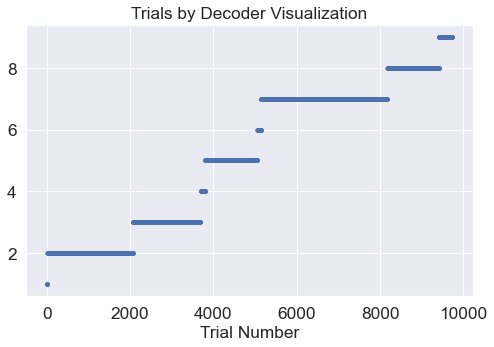

In [31]:
n_bmiUnitsDec, bmiTrialsPerDecoder, bmiTrialsPerSession = getTrialsByDecoder(n_dict)

In [32]:
bmiTrialsPerSession

array([  4.,   3.,  13., 337., 302., 260., 432., 326., 327.,  64., 490.,
       563., 571., 112., 465., 676., 111.,  88., 494., 446., 575., 557.,
       444., 409., 107., 363., 488., 287.,  95., 327.])

In [33]:
bmiTrialsPerDecoder
# indexing trials in decoder 2 = [bmiTrialsPerDecoder[0]:bmiTrialsPerDecoder[0]+bmiTrialsPerDecoder[1]]

array([  20., 2048., 1624.,  112., 1252.,   88., 3032., 1233.,  327.])

In [34]:
# this is time-binned neurons x all trials
print(n_bmiUnitsTimeAvg.shape)
n_bmiUnitsTimeAvg

(19, 9736)


array([[-21.46190476,  49.96666667,  -7.17619048, ..., -49.86622105,
        -49.86622105,  22.407156  ],
       [-10.68333333, -10.68333333,   3.60238095, ...,   3.40556033,
         -5.02404445,  -5.02404445],
       [  9.35714286,  37.92857143,  52.21428571, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [ 61.74761905, 147.46190476, -95.3952381 , ...,  76.30690455,
        -90.27174828, 209.56982681],
       [ 65.80714286, 165.80714286,  65.80714286, ..., 300.        ,
         42.85714286,  85.71428571],
       [ 11.8452381 ,  11.8452381 , -45.29761905, ..., 159.82996517,
         58.47039454,  58.47039454]])

DECODER 1

In [35]:
# EXAMPLES
print(trialTargVector[:, 10])
TARG_IDX = 0
TARGX_IDX = 1
TARGY_IDX = 2

[ 5.0000000e+00 -1.0000000e+00  1.2246468e-16]


(19, 10)
(3, 9736)
(10,)
Neurons:  1
Neurons:  2
Neurons:  3
Neurons:  4
Neurons:  5
Neurons:  6
Neurons:  7
Neurons:  8
Neurons:  9
Neurons:  10
Neurons:  11
Neurons:  12
Neurons:  13
Neurons:  14
Neurons:  15
Neurons:  16
Neurons:  17
Neurons:  18
Neurons:  19


Text(0.5, 1.0, 'Decoder 1, First 10 Trials')

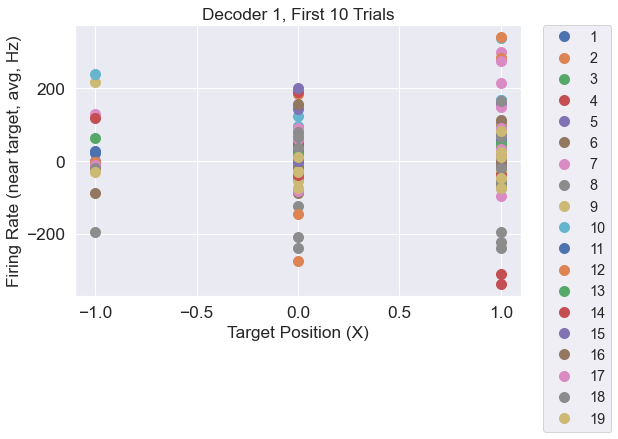

In [36]:
# trials nums are 0 - 9
# I want 16 x X x Y of 0 - 10 and 16 x X x Y of [37 - 10: 37]

trialsLen = 10
 
# num neurons x first 10 trials
n_bmiUnitsD1_start = n_bmiUnitsTimeAvg[:, 0:trialsLen]

numNeurons = n_bmiUnitsD1_start.shape[0]
print(n_bmiUnitsD1_start.shape)
print(trialTargVector.shape)
x1_data = trialTargVector[TARGX_IDX, 0:trialsLen]
print(x1_data.shape)

for iN in range(numNeurons):
    print("Neurons: ", iN+1)
    plt.plot(x1_data, n_bmiUnitsD1_start[iN ,:].T, '.', markersize = 20, label = iN+1)
    
# plt.plot(x1_data, n_bmiUnitsD1_start[1,:].T, '.', label = "n1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel("Target Position (X)")
plt.ylabel("Firing Rate (near target, avg, Hz)")
plt.title("Decoder 1, First 10 Trials")
# print(n_bmiUnitsD1_start)

In [37]:
n_bmiUnitsD1_startAvg = np.mean(n_bmiUnitsTimeAvg[:, 0:trialsLen], axis = 1)

In [38]:
decStartInd, decEndInd = returnDecoderIndices(bmiTrialsPerDecoder, 1)
print(decStartInd, decEndInd)

0 20


(19, 10)
(3, 9736)
(10,)
Neurons:  1
Neurons:  2
Neurons:  3
Neurons:  4
Neurons:  5
Neurons:  6
Neurons:  7
Neurons:  8
Neurons:  9
Neurons:  10
Neurons:  11
Neurons:  12
Neurons:  13
Neurons:  14
Neurons:  15
Neurons:  16
Neurons:  17
Neurons:  18
Neurons:  19


Text(0.5, 1.0, 'Decoder 1, Last 10 Trials')

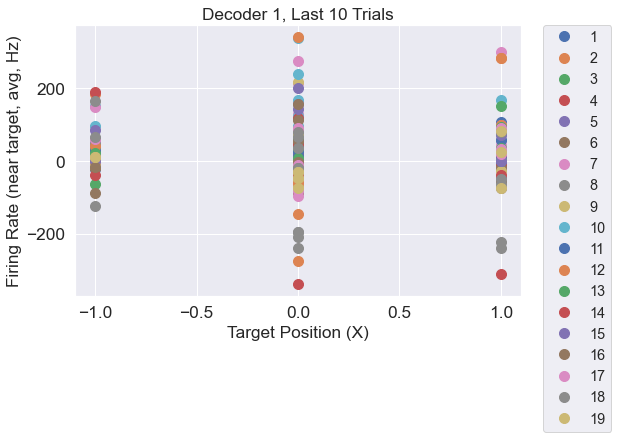

In [39]:
decStartInd, decEndInd = returnDecoderIndices(bmiTrialsPerDecoder, 1)
# num neurons x first 10 trials
n_bmiUnitsD1_end = n_bmiUnitsTimeAvg[:, decEndInd-trialsLen:decEndInd]

numNeurons = n_bmiUnitsD1_end.shape[0]
print(n_bmiUnitsD1_end.shape)
print(trialTargVector.shape)
x1_data = trialTargVector[TARGX_IDX, decEndInd-trialsLen:decEndInd]
print(x1_data.shape)

for iN in range(numNeurons):
    print("Neurons: ", iN+1)
    plt.plot(x1_data, n_bmiUnitsD1_start[iN ,:].T, '.', markersize = 20, label = iN+1)
    
# plt.plot(x1_data, n_bmiUnitsD1_start[1,:].T, '.', label = "n1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Target Position (X)")
plt.ylabel("Firing Rate (near target, avg, Hz)")
plt.title("Decoder 1, Last 10 Trials")

Text(0, 0.5, 'target x')

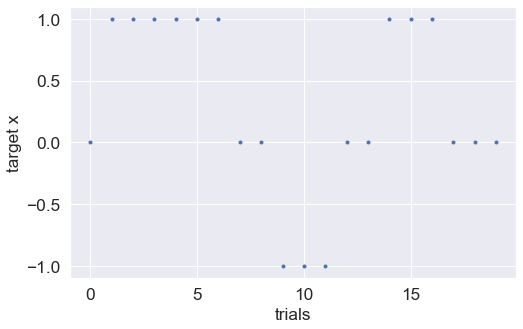

In [40]:
plt.plot(trialTargVector[TARGX_IDX, decStartInd:decEndInd], '.')
plt.xlabel("trials")
plt.ylabel("target x")

In [41]:
#Look at 1 and -1 at targets

trialTargVectorD1 = trialTargVector[:, decStartInd:decEndInd]
print(trialTargVectorD1.shape)
print(trialTargVectorD1[TARGX_IDX])

# D1_targ1X = np.where(trialTargVectorD1[TARGX_IDX] == 1
D1_xpos1 = np.where(trialTargVectorD1[TARGX_IDX] == 1)[0]
# D1_x1.append(np.where(trialTargVectorD1[TARGX_IDX] == -1)[0])
print(np.where(trialTargVectorD1[TARGX_IDX] == 1)[0])
print(np.where(trialTargVectorD1[TARGX_IDX] == -1)[0])
D1_xpos1 = np.append(D1_xpos1, np.where(trialTargVectorD1[TARGX_IDX] == -1)[0])
D1_xpos1.sort()
D1_xpos1

(3, 20)
[-1.8369702e-16  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  0.0000000e+00
  6.1232340e-17 -1.0000000e+00 -1.0000000e+00 -1.0000000e+00
 -1.8369702e-16 -1.8369702e-16  1.0000000e+00  1.0000000e+00
  1.0000000e+00 -1.8369702e-16 -1.8369702e-16 -1.8369702e-16]
[ 1  2  3  4  5  6 14 15 16]
[ 9 10 11]


array([ 1,  2,  3,  4,  5,  6,  9, 10, 11, 14, 15, 16])

In [42]:
# so let's look at D1_xpos1 first 4
n_bmiUnitsTimeAvg.shape

(19, 9736)

In [43]:
# H matrix
Hs = dec_df['Hs'][0]
print("decoder H:", Hs.shape)

# mean and standard deviation of firing rates
meanFR = n_dict['mFRs']
sdFR = n_dict['sdFRs']
print("Mean FR:", meanFR.shape)
print("std dev FR:",sdFR.shape)

Hs_offset = Hs[:,4,:]
print(Hs_offset.shape)
print(Hs_offset)

decoder H: (19, 5, 9)
Mean FR: (30, 640)
std dev FR: (30, 640)
(19, 9)
[[ 7.62885148e-01  2.18916684e-01  6.38326578e-01  6.38326578e-01
   9.84357994e-01  9.84357994e-01  1.44206366e+00  1.30189569e+00
   1.18083057e+00]
 [ 1.64724822e-03 -3.80895051e-02 -7.69611798e-02 -7.69611798e-02
   7.52046248e-04  7.52046248e-04 -1.86413195e-01  9.18471681e-02
   4.87729426e-02]
 [ 2.11013191e-01 -3.69075699e-02  1.22841417e-01             nan
              nan             nan             nan             nan
              nan]
 [ 1.48802155e-01  4.60010370e-01  5.45757572e-01  5.45757572e-01
   2.12370881e-01  2.12370881e-01  2.61003346e-02  5.46882990e-02
   1.64392662e-02]
 [            nan             nan             nan  1.22841417e-01
  -1.70350060e-01 -1.70350060e-01  4.24243271e-01 -1.48385660e+00
  -1.06406679e+00]
 [ 6.24510219e-02 -3.76120708e-01 -1.25182334e-01             nan
              nan             nan             nan             nan
              nan]
 [            nan      

In [44]:
# so let's look at D1_xpos1 first 4
print(D1_xpos1[:4])
D1_xpos1_start = n_bmiUnitsTimeAvg[:, D1_xpos1[:4]]
D1_xpos1_startAvg = np.mean(n_bmiUnitsTimeAvg[:, D1_xpos1[:4]], axis = 1)
print(D1_xpos1[-4:])
D1_xpos1_end = n_bmiUnitsTimeAvg[:, D1_xpos1[-4:]]
D1_xpos1_endAvg = np.mean(n_bmiUnitsTimeAvg[:, D1_xpos1[-4:]], axis = 1)

[1 2 3 4]
[11 14 15 16]


In [45]:
D1_xpos1_endAvg.shape

(19,)

In [46]:
# baseline
baseline = Hs_offset[:, 1]
baseline.shape

(19,)

Text(0.5, 1.0, 'Change in Firing Rate vs Target Position (x, |x| = 1) For Decoder 1')

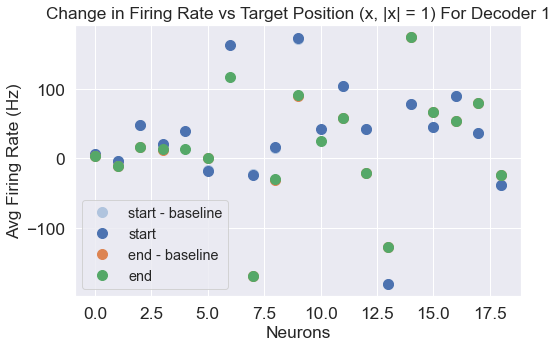

In [47]:
plt.figure()
plt.plot(D1_xpos1_startAvg - baseline,'.', markersize=20, color='lightsteelblue', label = 'start - baseline')
plt.plot(D1_xpos1_startAvg,'.', markersize=20, label = 'start')
plt.plot(D1_xpos1_endAvg - baseline,'.', markersize=20, label = 'end - baseline')
plt.plot(D1_xpos1_endAvg ,'.', markersize=20, label = 'end')
# plt.show()
plt.legend()
plt.xlabel('Neurons')
plt.ylabel('Avg Firing Rate (Hz)')
plt.title("Change in Firing Rate vs Target Position (x, |x| = 1) For Decoder 1")

Decoder 2

In [48]:
#Look at 1 and -1 at targets

decStartInd, decEndInd = returnDecoderIndices(bmiTrialsPerDecoder, 2)

trialTargVectorD2 = trialTargVector[:, decStartInd: decEndInd]
print(trialTargVectorD2.shape)
print(trialTargVectorD2[TARGX_IDX])

D2_xpos1 = np.where(trialTargVectorD2[TARGX_IDX] == 1)[0]
# print(np.where(trialTargVectorD2[TARGX_IDX] == 1)[0])
# print(np.where(trialTargVectorD2[TARGX_IDX] == -1)[0])
D2_xpos1 = np.append(D2_xpos1, np.where(trialTargVectorD2[TARGX_IDX] == -1)[0]);
D2_xpos1.sort();
D2_xpos1;

(3, 2048)
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ... -1.83697020e-16
  7.07106781e-01  7.07106781e-01]


In [49]:
D2_xpos1[:4] + decStartInd

array([20, 21, 22, 30])

In [50]:
D2_xpos1[-4:] + decStartInd

array([2059, 2060, 2061, 2062])

(19, 4)
(19, 4)


Text(0.5, 1.0, 'Change in Firing Rate vs Target Position (x, |x| = 1) For Decoder 2')

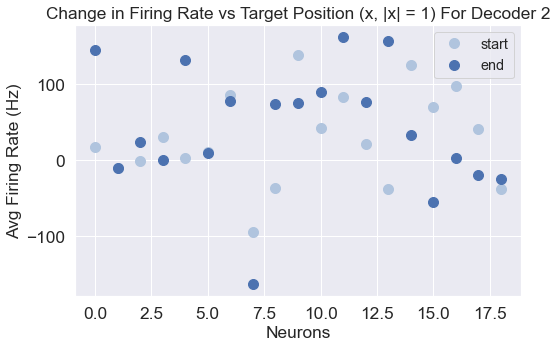

In [51]:
 
# num neurons x first 10 trials
D2_xpos1_start = n_bmiUnitsTimeAvg[:, D2_xpos1[:4] + decStartInd]
D2_xpos1_end = n_bmiUnitsTimeAvg[:, D2_xpos1[-4:] + decStartInd]

D2_xpos1_startAvg = np.mean(D2_xpos1_start, axis = 1)
D2_xpos1_endAvg = np.mean(D2_xpos1_end, axis = 1)
# numNeurons = n_bmiUnitsD1_start.shape[0]
print(D2_xpos1_start.shape)
print(D2_xpos1_end.shape)

plt.figure()
plt.plot(D2_xpos1_startAvg,'.', markersize=20, color='lightsteelblue', label = 'start')
plt.plot(D2_xpos1_endAvg,'.', markersize=20, label = 'end')
# plt.show()
plt.legend()
plt.xlabel('Neurons')
plt.ylabel('Avg Firing Rate (Hz)')
plt.title("Change in Firing Rate vs Target Position (x, |x| = 1) For Decoder 2")

Text(0.5, 1.0, 'Change in Firing Rate vs Target Position (x, |x| = 1) For Decoder 1 --> 2')

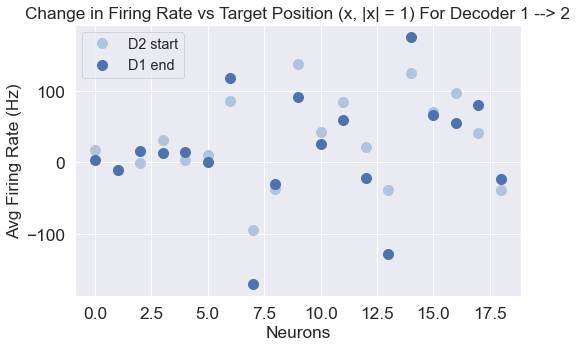

In [52]:
plt.figure()
plt.plot(D2_xpos1_startAvg,'.', markersize=20, color='lightsteelblue', label = 'D2 start')
plt.plot(D1_xpos1_endAvg,'.', markersize=20, label = 'D1 end')
# plt.show()
plt.legend()
plt.xlabel('Neurons')
plt.ylabel('Avg Firing Rate (Hz)')
plt.title("Change in Firing Rate vs Target Position (x, |x| = 1) For Decoder 1 --> 2")

Post Feb 22 2022 meeting with Sam and Amy -- try least squares with cxpy

(19, 9736)
(3, 9736)
(9736,)
trials per decoder: [  20. 2048. 1624.  112. 1252.   88. 3032. 1233.  327.]


Text(0.5, 0, 'Trial Number')

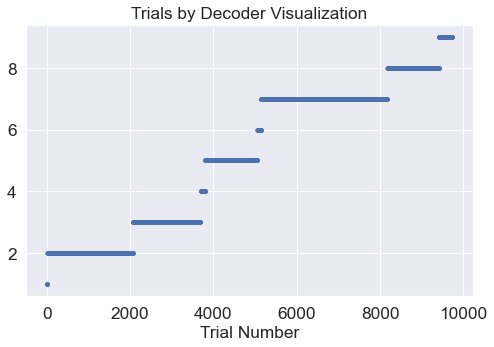

In [53]:
# still neurons x trials
print(n_bmiUnitsTimeAvg.shape)

# this is (target, x, y) x trials
print(trialTargVector.shape)

# this is trials x decoder
print(n_bmiUnitsDec.shape)

print("trials per decoder:", bmiTrialsPerDecoder)
 # bmiDecTrial is a trial num x 1 vector that assigs each trial to a decoder
plt.plot(n_bmiUnitsDec, '.')
plt.title("Trials by Decoder Visualization")
plt.xlabel("Trial Number")

In [54]:
# testing cvxpy for least squares

# goal -- what's the W matrix for the first n trials in decoder 1?
n_trials = 4
# n_bmiUnitsTimeAvg = time-averaged neurons x trials
print(trialTargVector[:, 4]) # 3 here is the trial number --> output is target, x, y
trialTargVectorAbs = np.abs(trialTargVector);
print(trialTargVectorAbs[:, 4])
trialTargVectorAbs[:, 4][1:] # to get only the target position 

[1. 1. 0.]
[1. 1. 0.]


array([1., 0.])

In [55]:
trialTargVectorAbs[:, :][1:].shape

(2, 9736)

In [56]:
trialTargVectorAbs[:, :][1:].shape[1]

9736

In [57]:
trSt = 20
trEnd = 40
firingRate = n_bmiUnitsTimeAvg[:, trSt:trEnd]
baselinefr = dec_df
targPosition = trialTargVectorAbs[1:, trSt:trEnd]
numNeurons = n_bmiUnitsTimeAvg.shape[0]
numDim = 2
numTrials = trEnd - trSt
w_estimate, solve, resdVect = findW_leastSquares(firingRate, targPosition, numNeurons, numDim)
w_estimate = w_estimate.value

In [58]:
fs_estimate = np.matmul(w_estimate, targPosition)

In [59]:
targPosition[0,:]

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 6.12323400e-17,
       6.12323400e-17, 6.12323400e-17, 6.12323400e-17, 7.07106781e-01,
       7.07106781e-01, 7.07106781e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 7.07106781e-01, 7.07106781e-01, 7.07106781e-01,
       7.07106781e-01, 7.07106781e-01, 7.07106781e-01, 7.07106781e-01])

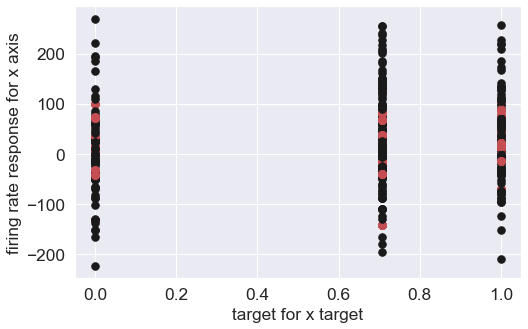

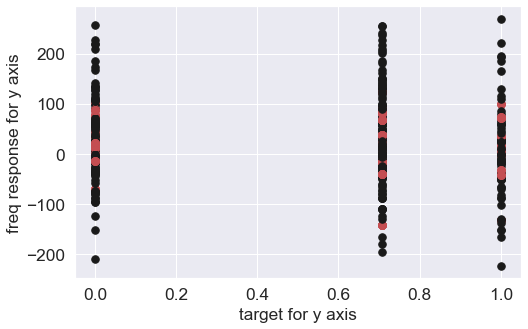

In [60]:
mkr = 15
# index = 0:18
# f = firing rate per neuron across trial
for index, f in enumerate(firingRate):
    plt.plot(targPosition[0,:], f,"k.", markersize=mkr)
    plt.plot(targPosition[0,:], fs_estimate[index,:],"r.", markersize=mkr)


plt.xlabel("target for x target")
plt.ylabel("firing rate response for x axis")
plt.show()

for index,f in enumerate(firingRate):
    plt.plot(targPosition[1,:],f,"k.", markersize=mkr)
    plt.plot(targPosition[1,:],fs_estimate[index,:],"r.", markersize=mkr)

plt.xlabel("target for y axis")
plt.ylabel("freq response for y axis")
plt.show()

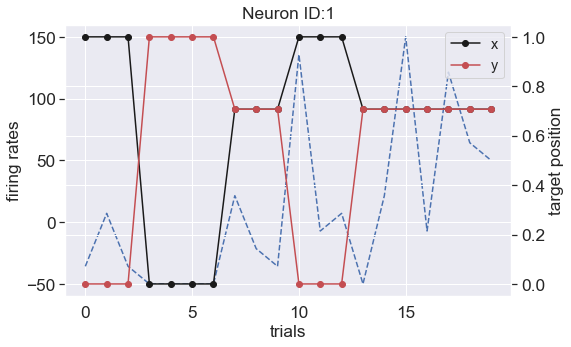

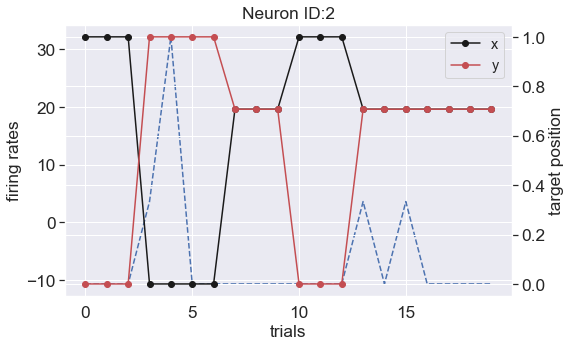

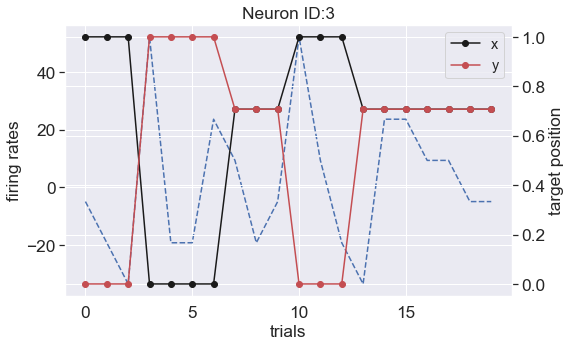

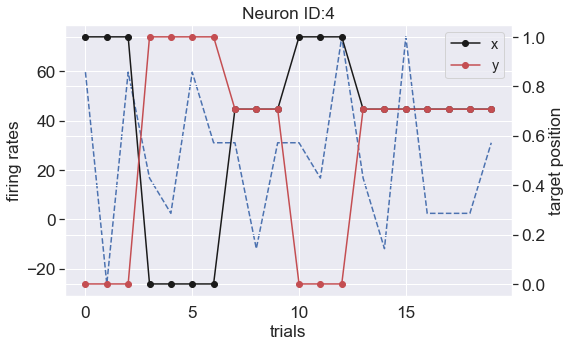

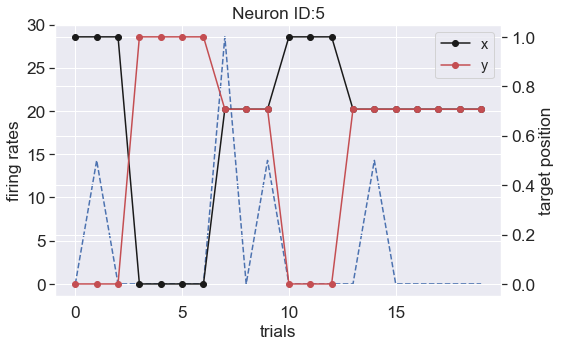

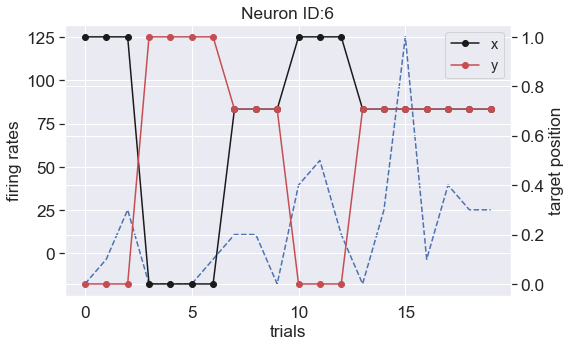

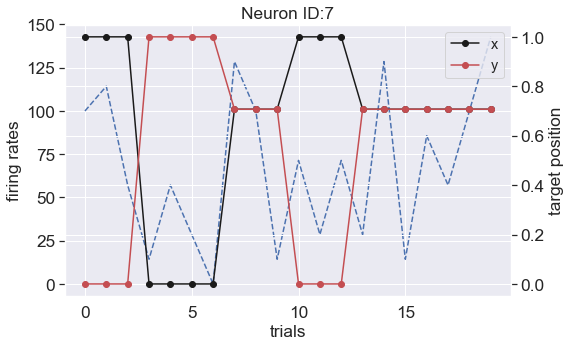

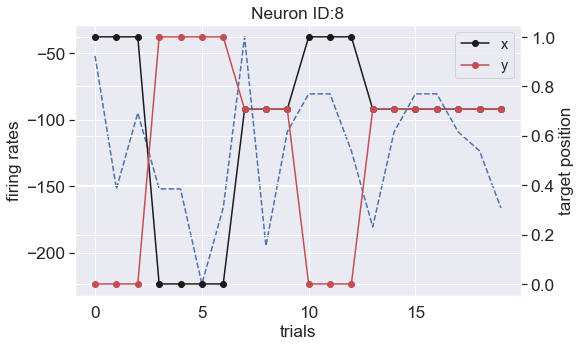

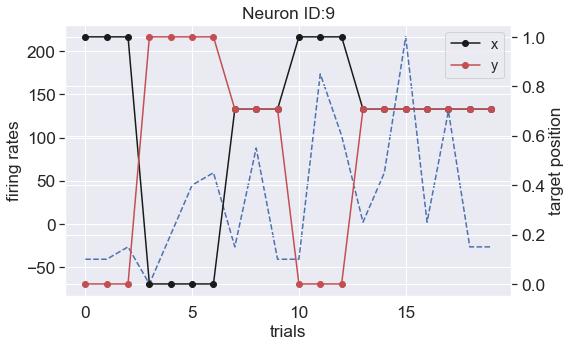

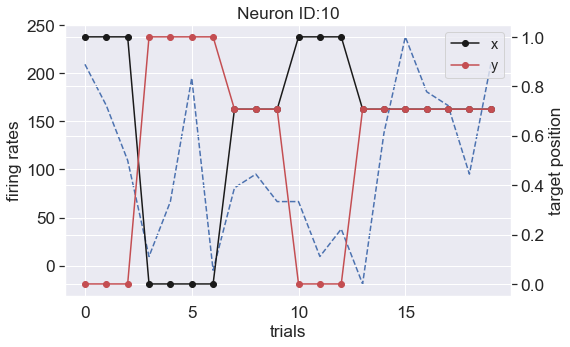

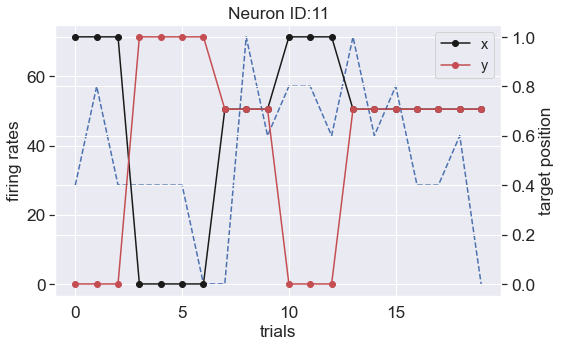

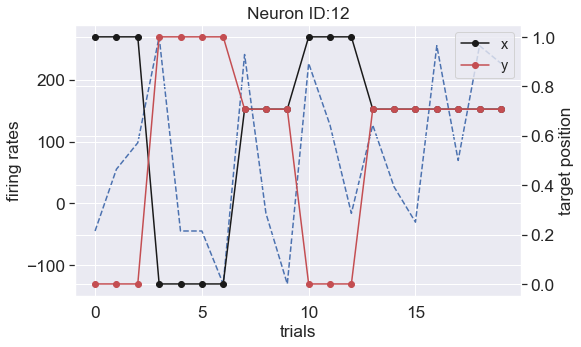

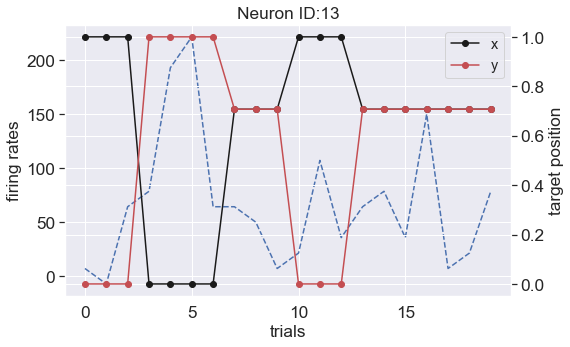

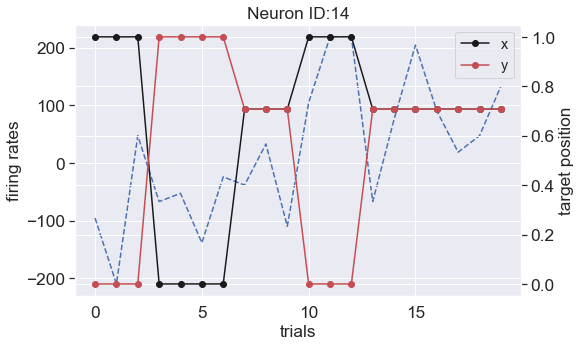

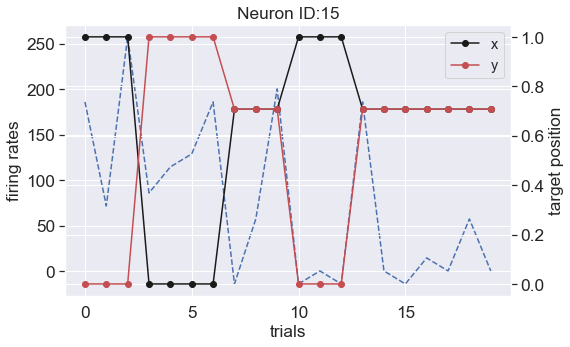

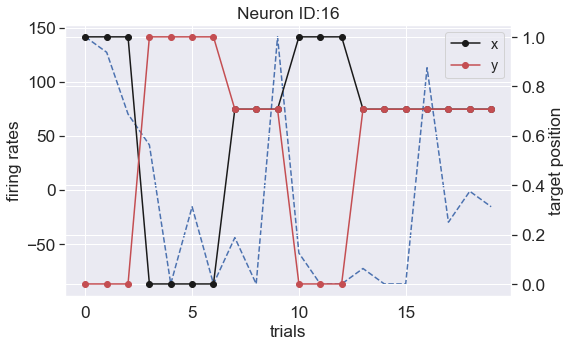

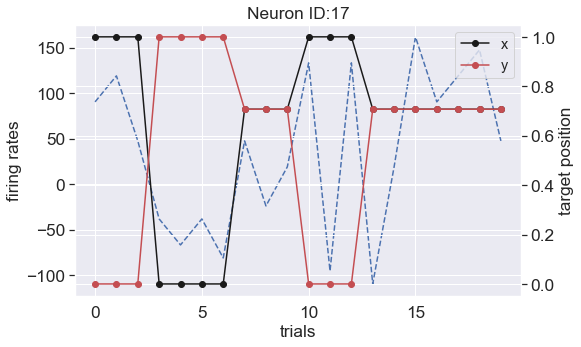

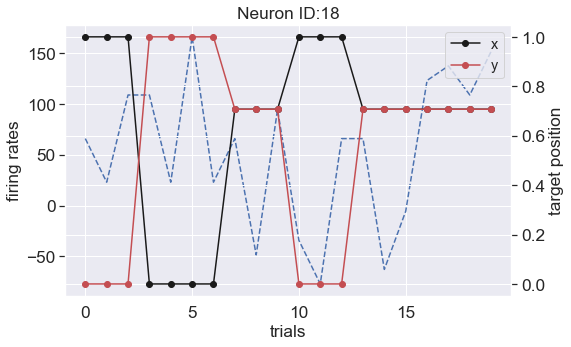

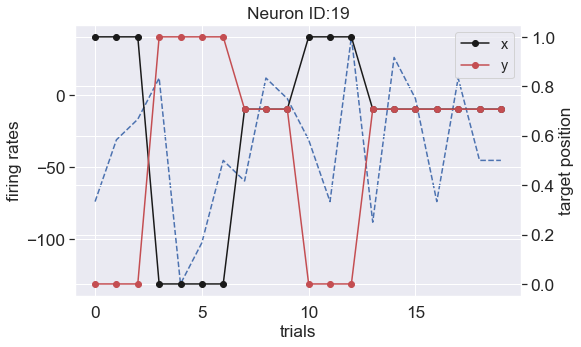

In [61]:
# fig,ax = plt.subplots()
for index, f in enumerate(firingRate):
    fig,ax = plt.subplots()
    ax.plot(firingRate[index,:], '--',label=(index+1))
    ax.set_xlabel("trials")
    ax.set_ylabel("firing rates")
    ax2 = ax.twinx()
    ax2.plot(targPosition[0,:], 'k-o', label='x')
    ax2.plot(targPosition[1,:], 'r-o', label='y')
    ax2.set_ylabel("target position")
    plt.title("Neuron ID:" + str(index+1))
    plt.legend()

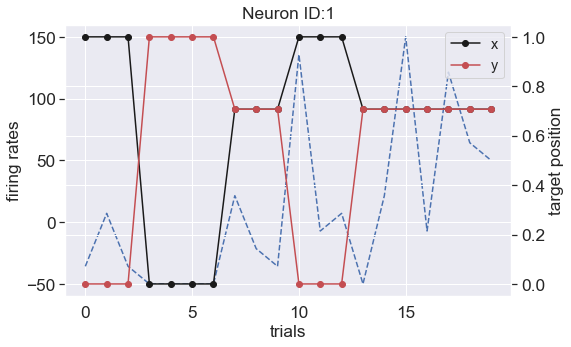

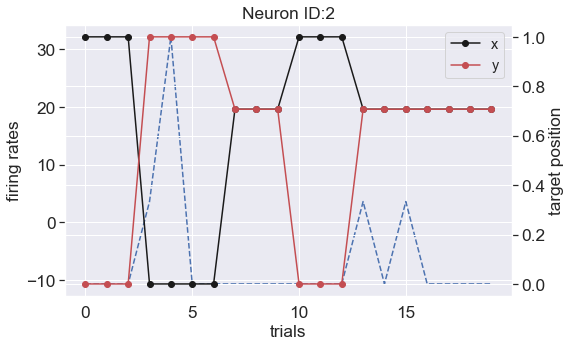

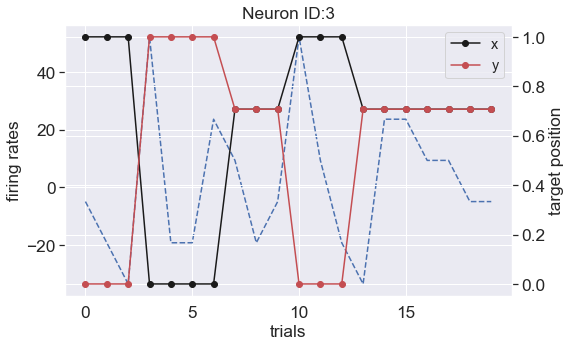

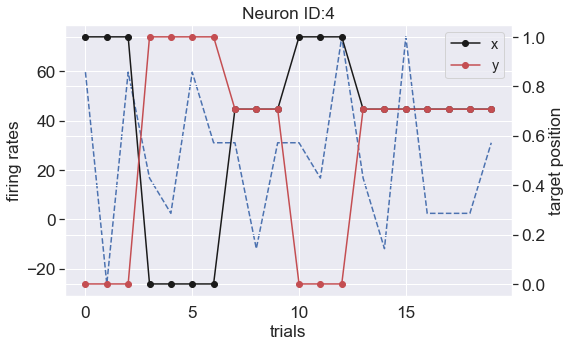

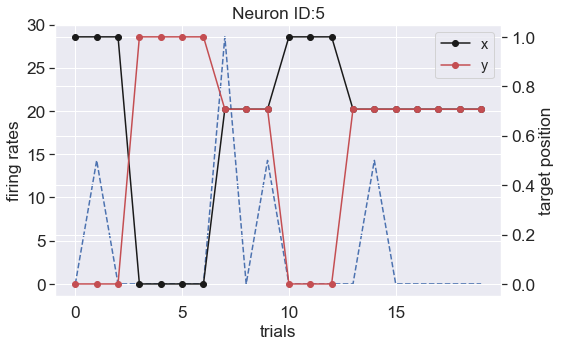

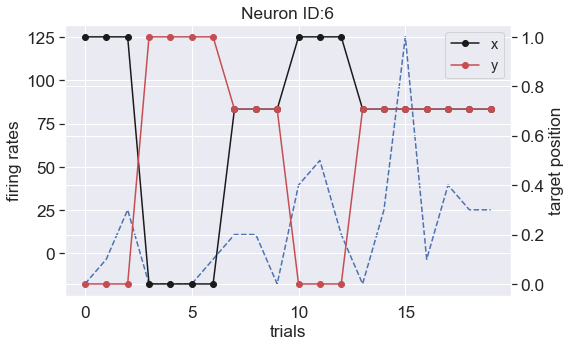

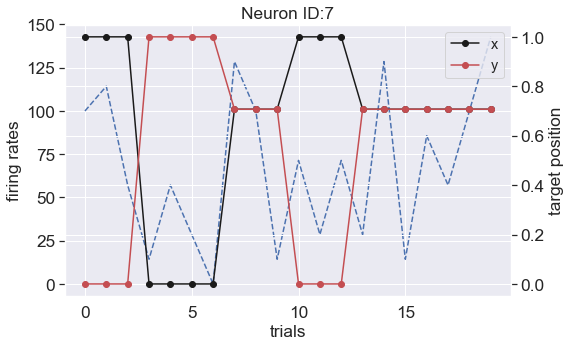

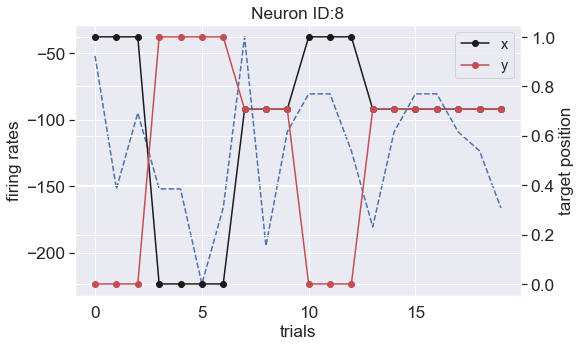

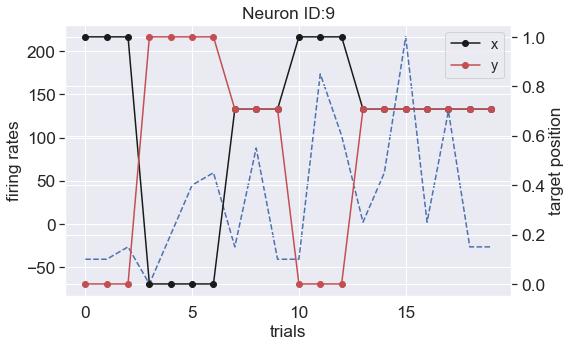

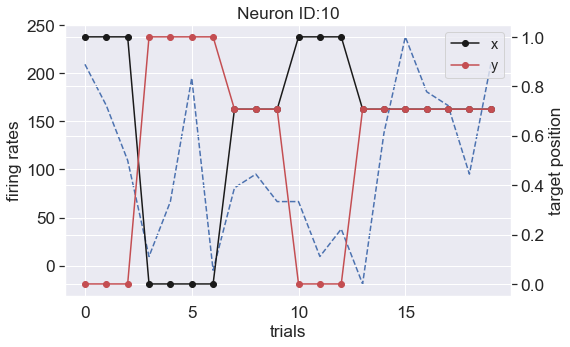

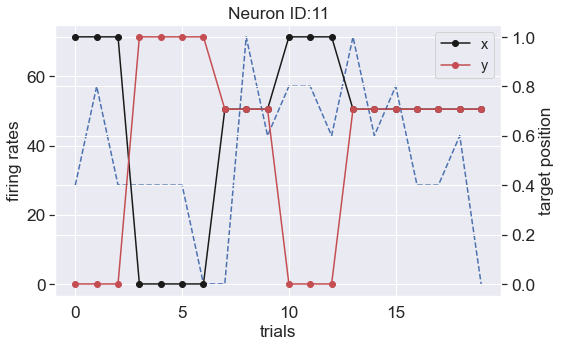

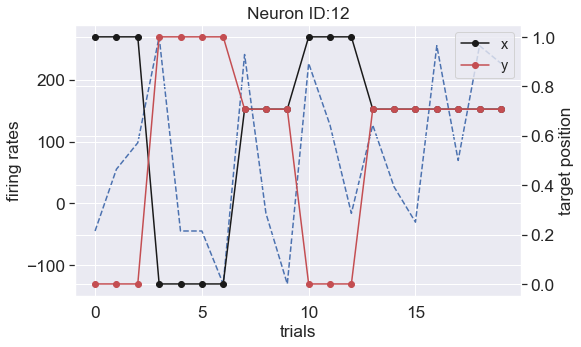

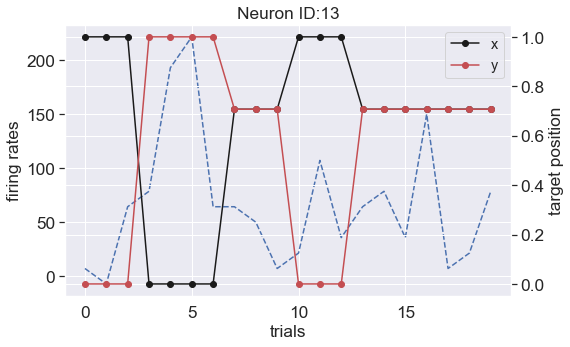

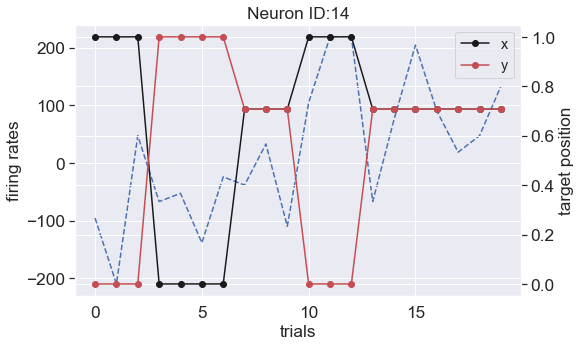

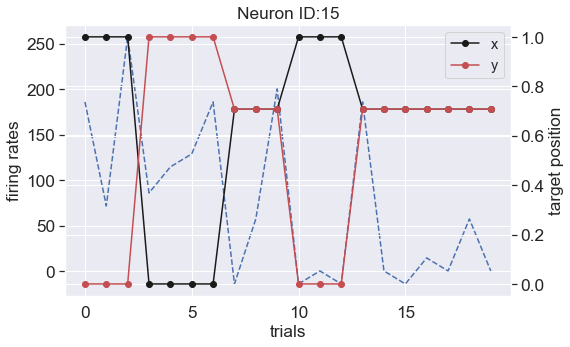

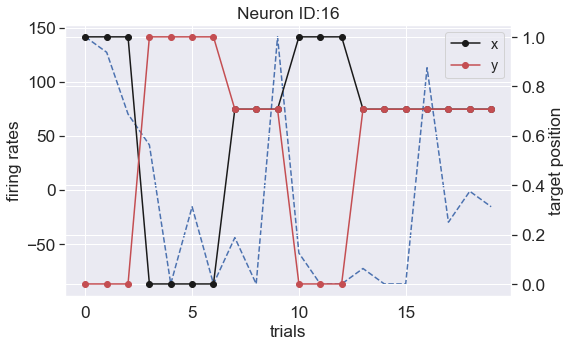

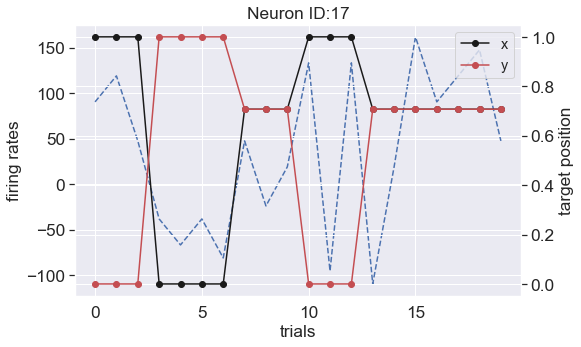

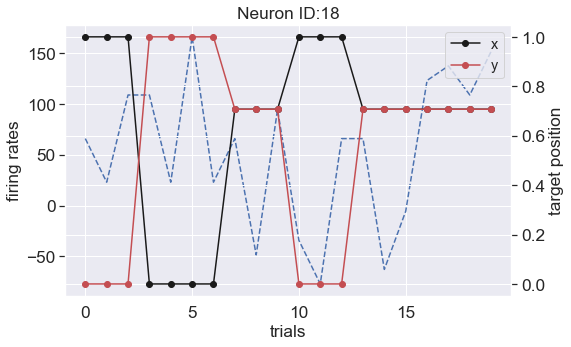

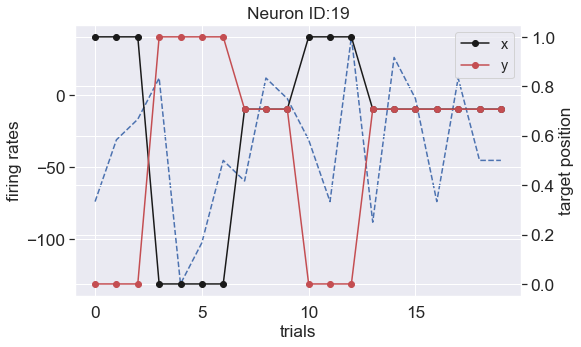

In [68]:
trSt = 20
trEnd = 40
firingRate = n_bmiUnitsTimeAvg[:, trSt:trEnd]
baselinefr = dec_df
targPosition = trialTargVectorAbs[1:, trSt:trEnd]
numNeurons = n_bmiUnitsTimeAvg.shape[0]
numDim = 2
numTrials = trEnd - trSt
w_estimate, solve, resdVect = findW_leastSquares(firingRate, targPosition, numNeurons, numDim)
w_estimate = w_estimate.value
# fig,ax = plt.subplots()
for index, f in enumerate(firingRate):
    fig,ax = plt.subplots()
    ax.plot(firingRate[index,:], '--')
    ax.set_xlabel("trials")
    ax.set_ylabel("firing rates")
    ax2 = ax.twinx()
    ax2.plot(targPosition[0,:], 'k-o', label='x')
    ax2.plot(targPosition[1,:], 'r-o', label='y')
    ax2.set_ylabel("target position")
#     #      plt.plot(targPosition[0,:]*100, 'k-o')
    plt.title("Neuron ID:" + str(index+1))
    plt.legend()

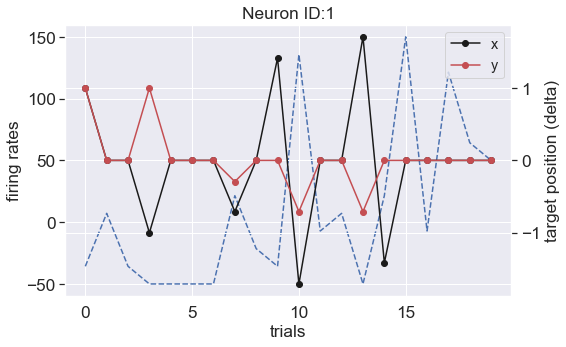

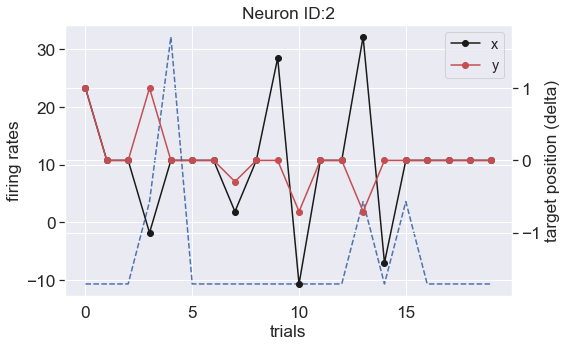

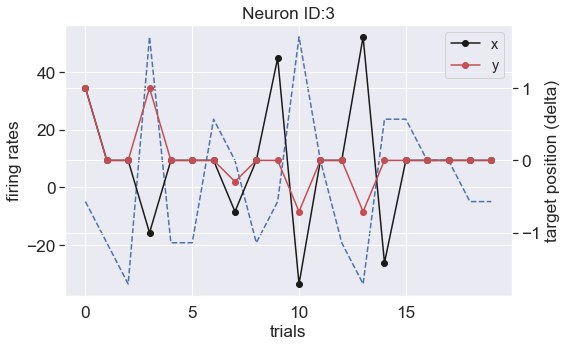

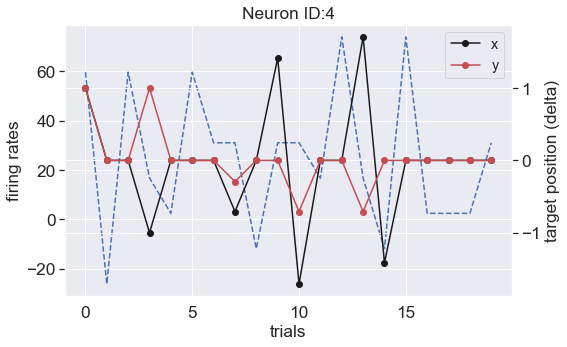

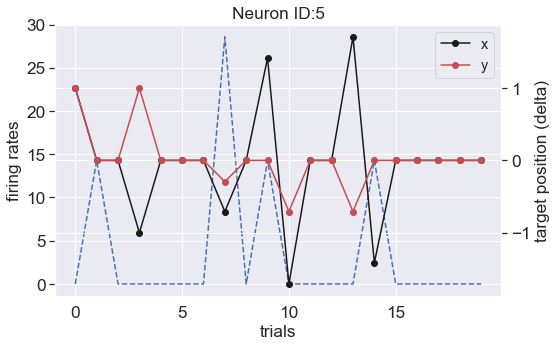

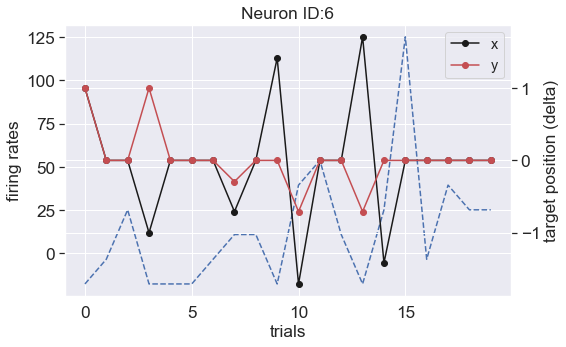

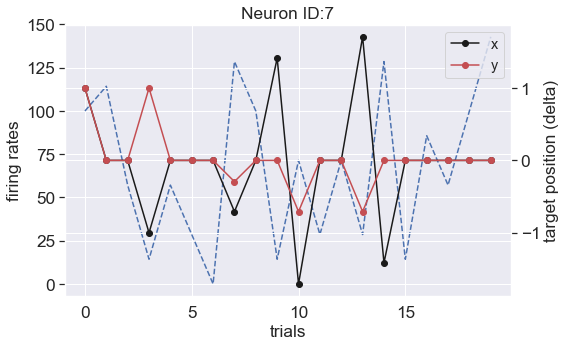

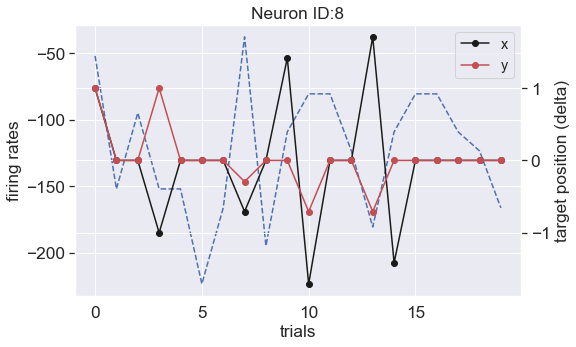

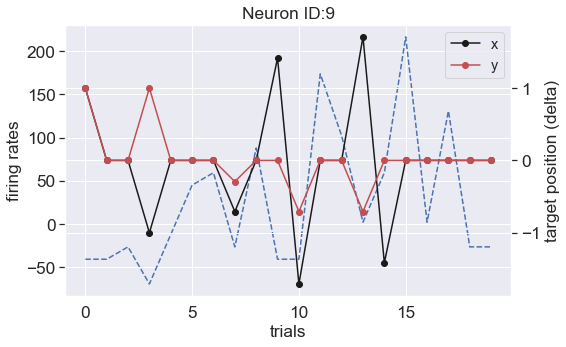

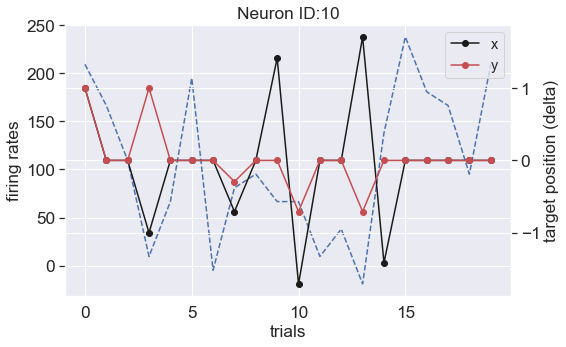

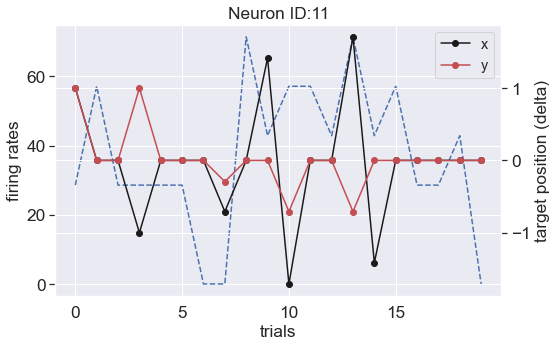

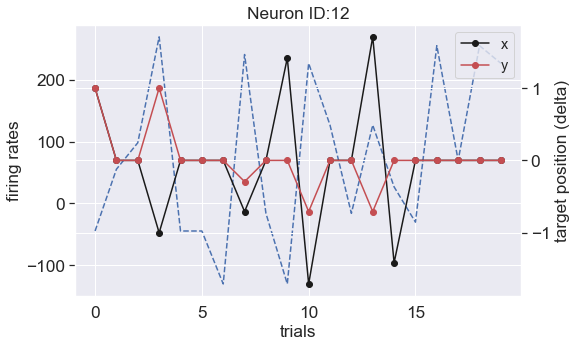

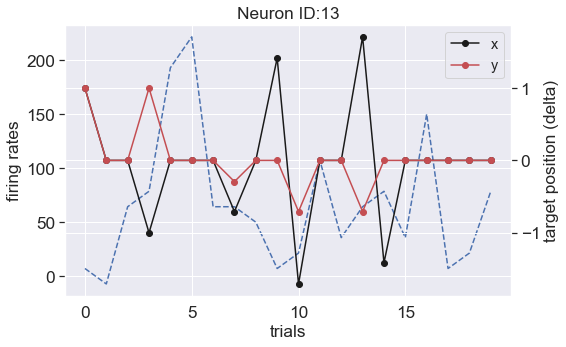

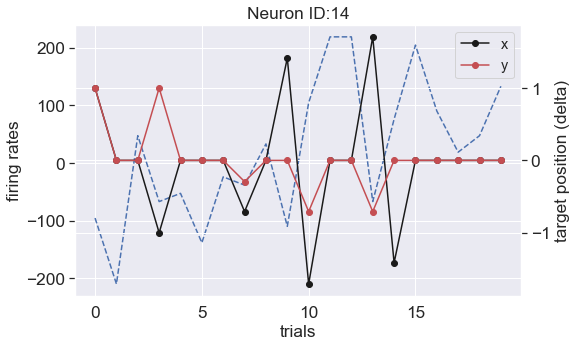

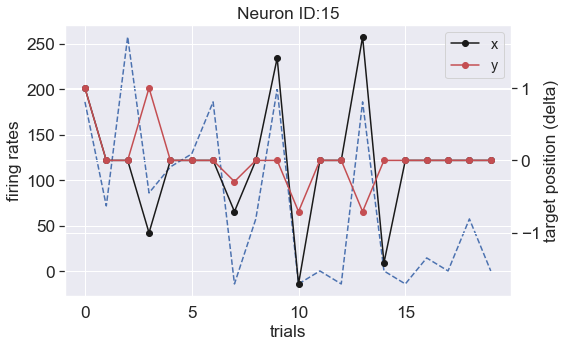

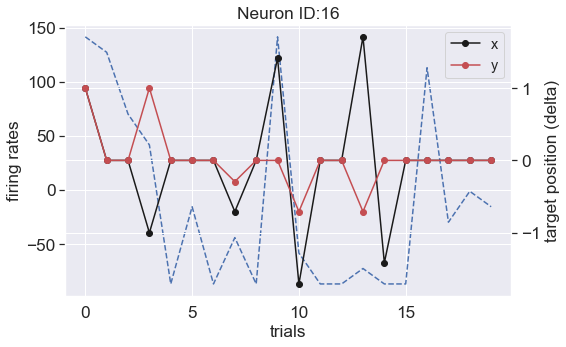

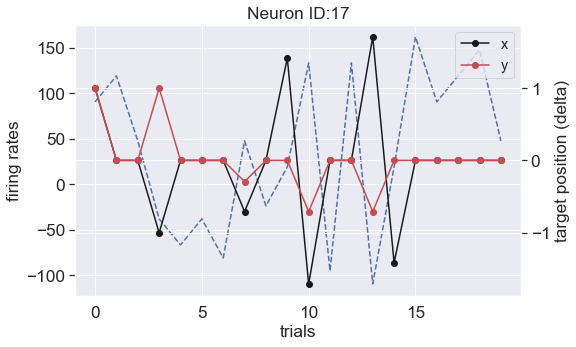

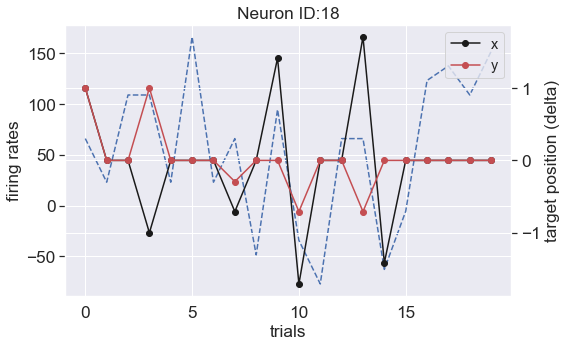

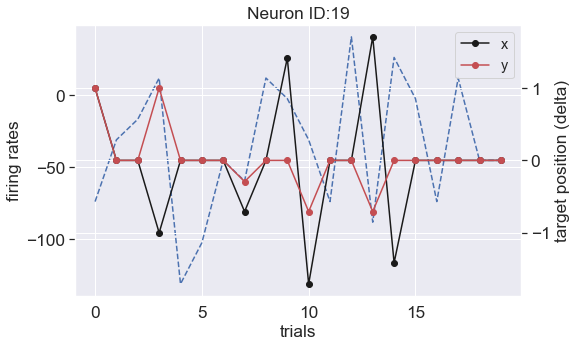

In [63]:
deltaT = trialTargVector[1:, trSt:trEnd] - trialTargVector[1:, trSt-1:trEnd-1]
for index, f in enumerate(firingRate):
    fig,ax = plt.subplots()
    ax.plot(firingRate[index,:], '--')
    ax.set_xlabel("trials")
    ax.set_ylabel("firing rates")
    ax2 = ax.twinx()
    ax2.plot(deltaT[0,:], 'k-o', label='x')
    ax2.plot(deltaT[1,:], 'r-o', label='y')
    ax2.set_ylabel("target position (delta)")
#     #      plt.plot(targPosition[0,:]*100, 'k-o')
    plt.title("Neuron ID:" + str(index+1))
    plt.legend()
#     plt.show()

In [70]:
R2, SStot, SSres = findRsquared(firingRate, fs_estimate, numNeurons, numTrials)
R2

array([  -9.85322963,   -2.45504108,  -35.0749709 ,  -23.25571558,
        -78.63358097,   -9.05150087,   -3.09200429,   -1.26650032,
       -170.35145495,  -12.75858365,   -2.75129952,  -33.70585094,
         -1.49319276,   -7.76266857,  -24.33263938,  -15.53664232,
         -2.09784255,   -8.50969313,  -12.58086385])

In [73]:
decStartInd, decEndInd = returnDecoderIndices(bmiTrialsPerDecoder, 2)
(decStartInd, decEndInd)

(20, 2068)

Find W across the trials, plot the R2

R2 is going to be per neuron

In [ ]:
numTr = 50
baseline_rep = np.matlib.repmat(baseline, numTr, 1)
numNeurons = n_bmiUnitsTimeAvg.shape[0]
numDim = 2

In [99]:
# 20 - 500
start = decStartInd
end = 150

R2_early = np.zeros((end-start-numTr, numNeurons))

print(start)
print(end)
print(R2_early.shape)

for trSt in range(start, end - numTr, 1):
    trEnd = trSt + numTr
#     print(trSt)
    firingRate = n_bmiUnitsTimeAvg[:, trSt:trEnd] 
    targPosition = trialTargVectorAbs[1:, trSt:trEnd]
    W, solve, resdVect = findW_leastSquares(firingRate, targPosition, numNeurons, numDim)
    W = W.value
    fs_estimate = W@targPosition
    R2_calc, SStot, SSres = findRsquared(firingRate, fs_estimate, numNeurons, numTrials)
    R2_early[trSt-start, :] = R2_calc

20
150
(80, 19)


In [101]:
# 700 - 1200
start = 700
end = 1200

R2_mid = np.zeros((end-start-numTr, numNeurons))

print(start)
print(end)
print(R2_mid.shape)

for trSt in range(start, end - numTr, 1):
    trEnd = trSt + numTr
#     print(trSt)
    firingRate = n_bmiUnitsTimeAvg[:, trSt:trEnd] 
    targPosition = trialTargVectorAbs[1:, trSt:trEnd]
    W, solve, resdVect = findW_leastSquares(firingRate, targPosition, numNeurons, numDim)
    W = W.value
    fs_estimate = W@targPosition
    R2_calc, SStot, SSres = findRsquared(firingRate, fs_estimate, numNeurons, numTrials)
    R2_mid[trSt-start, :] = R2_calc

700
1200
(450, 19)


In [120]:
#  1500 - 2068
start = 1200
end = decEndInd

R2_end = np.zeros((end-start-numTr, numNeurons))

print(start)
print(end)
print(R2_end.shape)

for trSt in range(start, end - numTr, 1):
    trEnd = trSt + numTr
#     print(trSt)
    firingRate = n_bmiUnitsTimeAvg[:, trSt:trEnd] 
    targPosition = trialTargVectorAbs[1:, trSt:trEnd]
    W, solve, resdVect = findW_leastSquares(firingRate, targPosition, numNeurons, numDim)
    W = W.value
    fs_estimate = W@targPosition
    R2_calc, SStot, SSres = findRsquared(firingRate, fs_estimate, numNeurons, numTrials)
    R2_end[trSt-start, :] = R2_calc

1200
2068
(818, 19)


/Users/mmadduri/.pyenv/versions/3.8.5/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


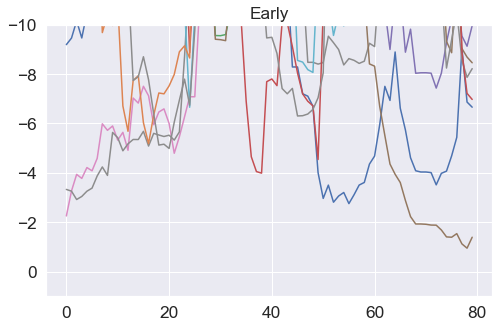

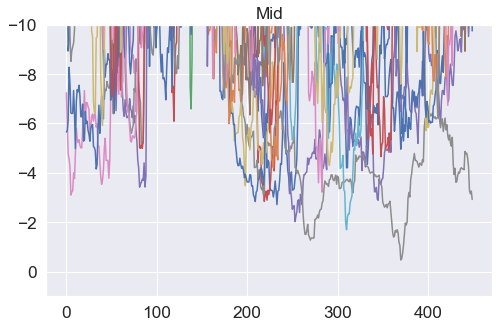

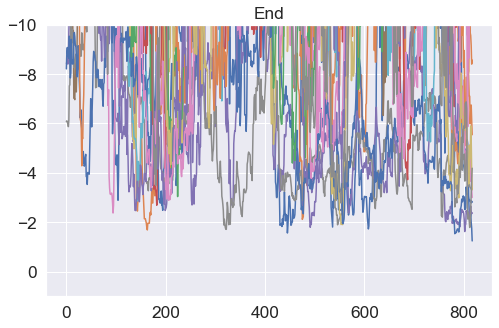

In [151]:
plt.plot(R2_early)
plt.ylim((1,-10))
plt.title("Early")
plt.show()

plt.plot(R2_mid)
plt.ylim((1,-10))
plt.title("Mid")
plt.show()

plt.plot(R2_end)
plt.ylim((1,-10))
plt.title("End")
plt.show()

In [152]:
#  1500 - 2068
start = 1200
end = decEndInd

R2_end_delta = np.zeros((end-start-numTr, numNeurons))

print(start)
print(end)
print(R2_end_delta.shape)

for trSt in range(start, end - numTr, 1):
    trEnd = trSt + numTr
#     print(trSt)
    firingRate = n_bmiUnitsTimeAvg[:, trSt:trEnd] 
    targPosition = trialTargVectorAbs[1:, trSt:trEnd]
    targDelta = trialTargVectorAbs[1:, trSt:trEnd] - trialTargVectorAbs[1:, trSt-1:trEnd-1]
    W, solve, resdVect = findW_leastSquares(firingRate, targPosition, numNeurons, numDim)
    W = W.value
    fs_estimate = W@targPosition
    R2_calc, SStot, SSres = findRsquared(firingRate, fs_estimate, numNeurons, numTrials)
    R2_end_delta[trSt-start, :] = R2_calc

/Users/mmadduri/.pyenv/versions/3.8.5/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1200
2068
(818, 19)


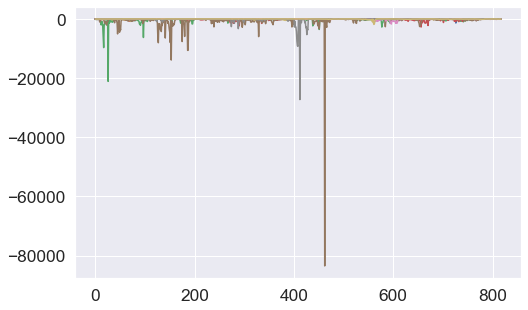

In [153]:
plt.plot(R2_end_delta)

In [72]:
# seaborn.histplot(resdnormTest,kde=True)
# plt.xlabel("Residual $||Wt - f||_2$")

NameError: name 'resdnormTest' is not defined

/Users/mmadduri/.pyenv/versions/3.8.5/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RV : 
Distribution : 
 [0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.         2.33333333 2.66666667 3.        ]
(10,)
gaussian scaling:
[0.23504909 0.22234692 0.1882126  0.14256448 0.09663157 0.05861001
 0.03181044 0.01544943 0.0067143  0.00261116]
1.0


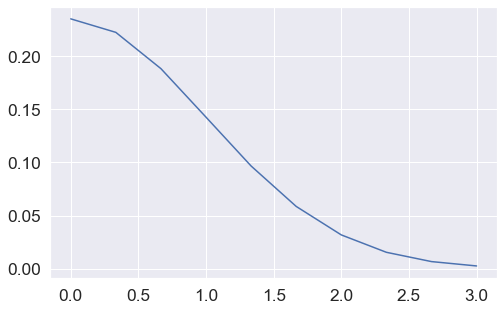

In [150]:
from scipy.stats import truncnorm 

def gaussianDistribution(numElements):
    numargs = truncnorm .numargs 
    a, b = 0, 3
    rv = truncnorm (a, b) 
    distribution = np.linspace(0, np.minimum(rv.dist.b, 3), numElements)  

    gaussScale = rv.pdf(distribution)/np.sum(rv.pdf(distribution))
#     plot = plt.plot(distribution, gaussScale)
    return (distribution, gaussScale)